In [417]:
from analysisTools import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy import io
from scipy.spatial.transform import Rotation
import os

In [418]:
folder = 'datasets/online_recovery_control/'
files = sorted([fname for fname in os.listdir(folder) if fname.startswith('data') and fname.endswith('.json')],
               key=lambda f: int(f.strip('data').strip('.json')))
print(files)

['data1.json', 'data2.json', 'data3.json', 'data4.json', 'data5.json', 'data6.json', 'data7.json', 'data8.json', 'data9.json', 'data10.json', 'data11.json']


In [434]:
i = 9

fname = files[i]

# folder = ''
# fname = 'data.json'
print(fname)

data10.json


# Test 1

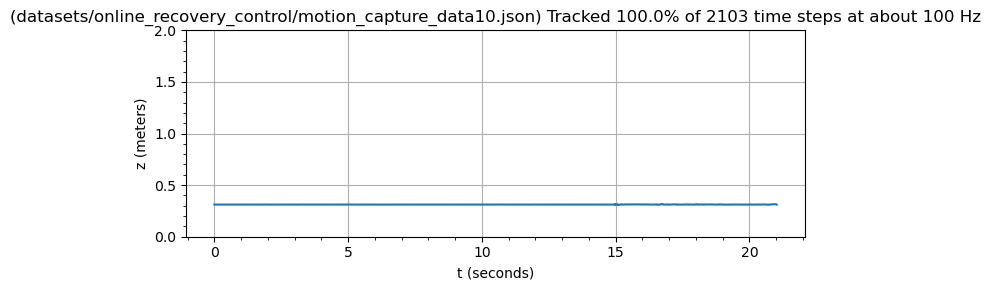

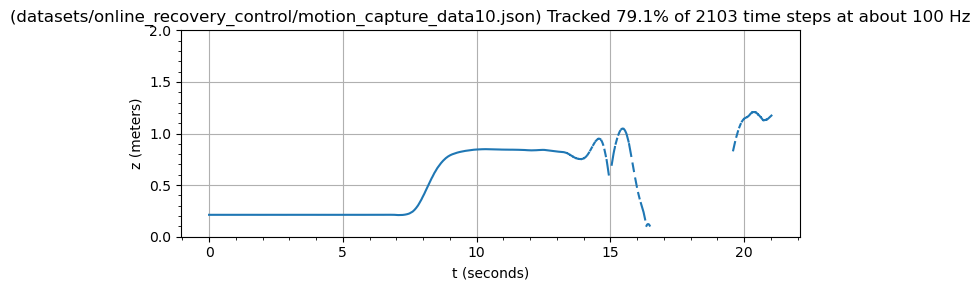

In [435]:
drone_file = folder + fname
mocap_file = folder + 'motion_capture_' + fname

# drone_file = 'data.json'
# mocap_file = 'motion_capture_data.json'

check_mocap_coverage(mocap_file, 'soccerball')

check_mocap_coverage(mocap_file, 'cf1')

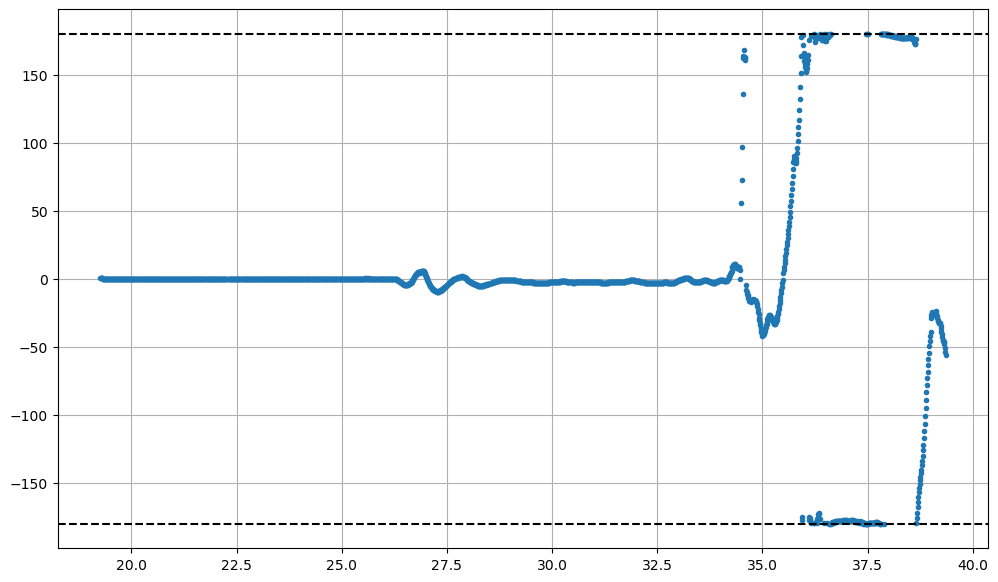

In [436]:
raw_drone_data = load_json_data(drone_file)

t_roll = raw_drone_data['stateEstimate.roll']['time']
roll_roll = raw_drone_data['stateEstimate.roll']['data']

fig, ax = plt.subplots(1, 1, figsize=(12,7))

ax.plot(t_roll, roll_roll, '.')
ax.grid()
ax.axhline(180,ls='--',c='k')
ax.axhline(-180,ls='--',c='k')

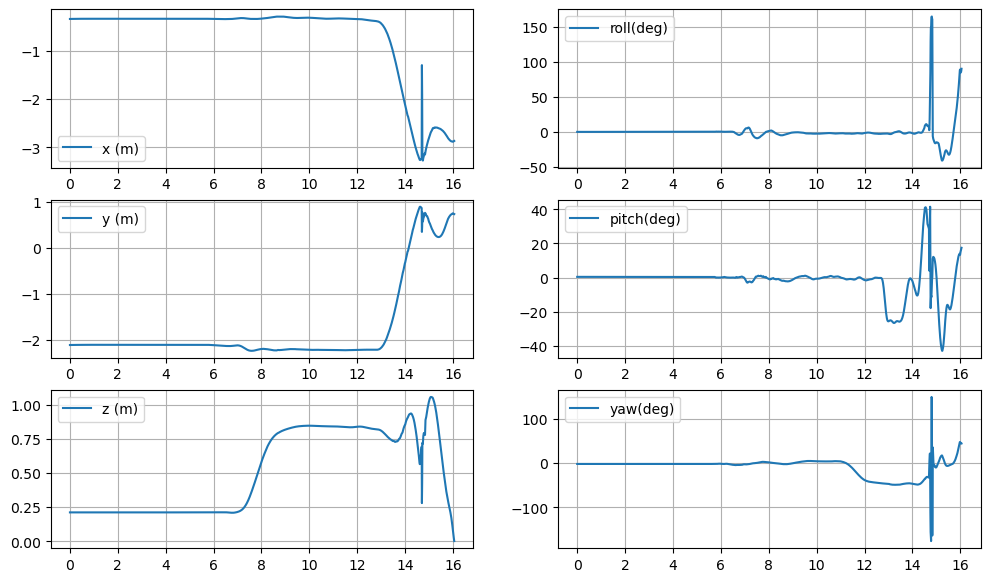

In [438]:

raw_drone_data = load_json_data(drone_file)

# print(
#     '\n'.join(raw_drone_data)
# )


t_min = 0.5
t_max = 3.5
# t_max = 0.0

V_MAX=raw_drone_data.pop('V_MAX')
P_LAND_DES=raw_drone_data.pop('P_LAND_DES')
Z_APEX=raw_drone_data.pop('Z_APEX')

drone_data = resample_data_drone(raw_drone_data, t_min_offset=t_min, t_max_offset=t_max)

t =             drone_data['time']

x =             drone_data['stateEstimate.x']
y =             drone_data['stateEstimate.y']
z =             drone_data['stateEstimate.z']
yaw =           drone_data['stateEstimate.yaw']
pitch =        -drone_data['stateEstimate.pitch']
roll  =         drone_data['stateEstimate.roll']
wx  =           drone_data['gyro.x']
wy  =           drone_data['gyro.y']
wz  =           drone_data['gyro.z']

fig, ax = plt.subplots(3, 2, figsize=(12,7))

ax[0][0].plot(t, x, label="x (m)")
ax[0][0].legend()
ax[0][0].grid()

ax[1][0].plot(t, y, label="y (m)")
ax[1][0].legend()
ax[1][0].grid()

ax[2][0].plot(t, z, label="z (m)")
ax[2][0].legend()
ax[2][0].grid()


ax[0][1].plot(t, roll, label="roll(deg)")
ax[0][1].legend()
ax[0][1].grid()

ax[1][1].plot(t, pitch, label="pitch(deg)")
ax[1][1].legend()
ax[1][1].grid()

ax[2][1].plot(t, yaw, label="yaw(deg)")
ax[2][1].legend()
ax[2][1].grid()



In [439]:
mocap_data_w_RPY = convert_rot_matrices_to_euler(
        load_json_data(mocap_file)['cf1']
    )

mocap_data, t_shift_min = sync_data_mocap(mocap_data_w_RPY, t, z)

print(f'Required time shift = {t_shift_min:2.2f} seconds')

t_mocap = np.array(mocap_data_w_RPY['time'], dtype=np.float64)
t_mocap -= (mocap_data_w_RPY['time'][0] - t_shift_min)
x_mocap = np.array(mocap_data_w_RPY['x'], dtype=np.float64)
y_mocap = np.array(mocap_data_w_RPY['y'], dtype=np.float64)
z_mocap = np.array(mocap_data_w_RPY['z'], dtype=np.float64)

roll_mocap = np.array(mocap_data_w_RPY['roll'], dtype=np.float64)
pitch_mocap = np.array(mocap_data_w_RPY['pitch'], dtype=np.float64)
yaw_mocap = np.array(mocap_data_w_RPY['yaw'], dtype=np.float64)

/Users/munna/miniforge3/envs/ae483/lib/python3.12/site-packages/numpy/linalg/_linalg.py:2383: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Required time shift = -0.35 seconds


Text(0.5, 0.98, 'Z position: Verify the time-shift, visually')

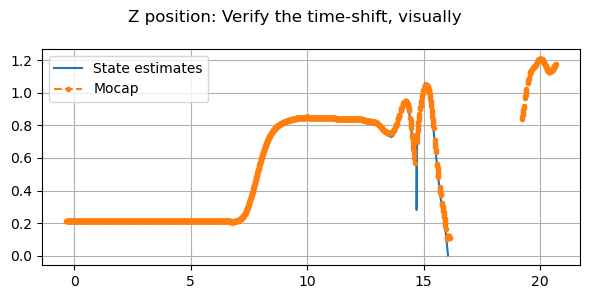

In [440]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey='col', figsize=(6, 3), tight_layout=True)

ax.plot(t, z, label='State estimates')
ax.plot(t_mocap, z_mocap,'.--', label='Mocap')
ax.grid()
ax.legend(loc='upper left')
fig.suptitle("Z position: Verify the time-shift, visually")

In [386]:
# az = drone_data['acc.z']

# fig, ax =  plt.subplots(1,1, figsize=(12,6))

# ax.plot(t, az)
# ax.plot(t[i_ff], az[i_ff], 'or')
# ax.plot(t[i_land], az[i_land], 'or')

# ax.set_xlim([t[i_ff], t[i_land]])
# ax.grid()

In [387]:
mocap_soccerball = load_json_data(mocap_file)['soccerball']

t_soccerball_mocap = np.array(mocap_soccerball['time'], dtype=np.float64)
t_soccerball_mocap -= (mocap_soccerball['time'][0] - t_shift_min)

x_ball_mocap = mocap_soccerball['x']
y_ball_mocap = mocap_soccerball['y']
z_ball_mocap = mocap_soccerball['z']
R_soccerball_mocap = mocap_soccerball['R']

R_soccerball_real = 55/2/100 # meter
print(R_soccerball_real)

0.275


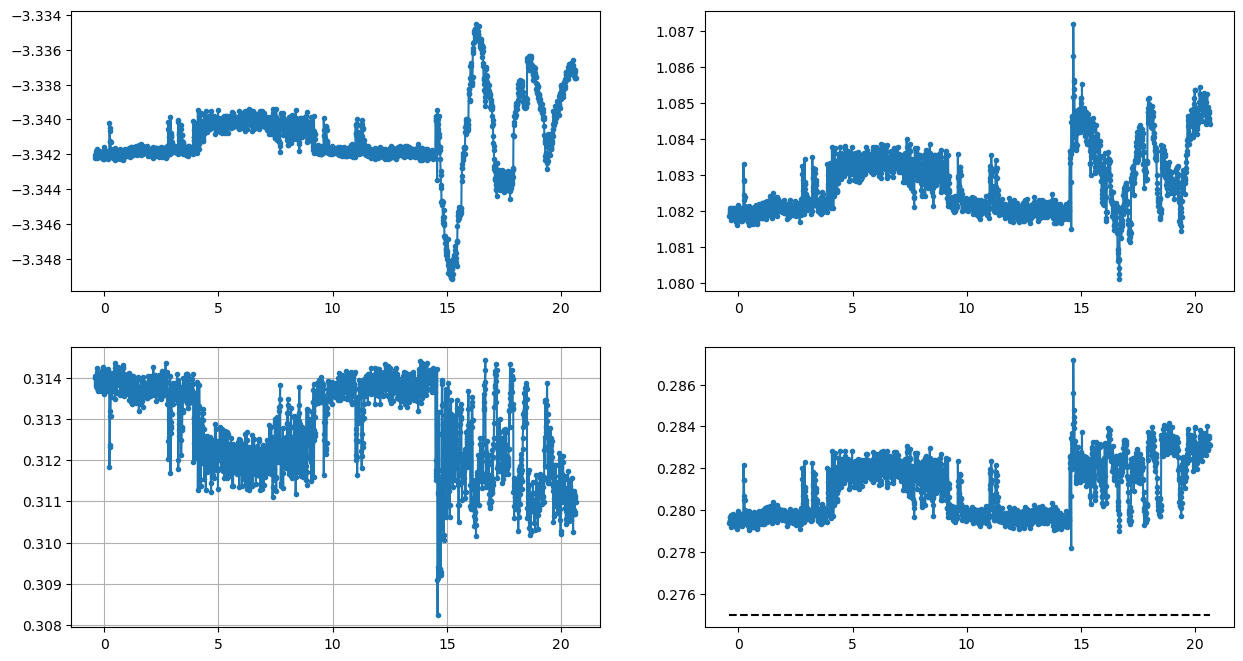

In [388]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

ax[0][0].plot(t_soccerball_mocap, x_ball_mocap, '.-')

ax[0][1].plot(t_soccerball_mocap, y_ball_mocap, '.-')

ax[1][0].plot(t_soccerball_mocap, z_ball_mocap, '.-')
ax[1][0].grid()

ax[1][1].plot(t_soccerball_mocap, R_soccerball_mocap, '.-')
ax[1][1].plot([t_soccerball_mocap[0], t_soccerball_mocap[-1]], [R_soccerball_real, R_soccerball_real], '--k')


In [389]:
def compute_freefall_pos(p_des: list[float, float], v_max: float, z_apex: float):
    """
    Compute the maximum x-position at the apex of the ballistic phase.
    """

    #   Convert lists to numpy arrays for quick math
    p_des = np.array(p_des)

    #   Compute the unit vector from current to desired landing position
    n_vel = p_des / np.linalg.norm(p_des)

    return p_des - v_max * np.sqrt(2*z_apex/9.81) * n_vel 

def compute_overshoot(p_des: list[float, float], v_max: float):

    #   Convert lists to numpy arrays for quick math
    p_des = np.array(p_des)

    #   Compute the unit vector from current to desired landing position
    n_vel = p_des / np.linalg.norm(p_des)

    # return np.array([0, 0])
    # return 0.1888 * v_max * n_vel + 0.0055
    return 0.4790 * v_max * n_vel + 0.1892
    # return 0.4790 * v_max * n_vel + 0.2

In [390]:
# # init_pos = np.array([np.nan, np.nan, np.nan])
# # init_soccer_pos = np.array([np.nan, np.nan, np.nan])

# init_pos = np.array([x[0], y[0], z[0]])

# init_soccer_pos = np.array([x_ball_mocap[0], y_ball_mocap[0], z_ball_mocap[0]])

# print(init_pos)
# print(init_soccer_pos)

# P_SWITCH=compute_freefall_pos(P_LAND_DES, V_MAX, Z_APEX-init_soccer_pos[2]) + init_pos[0:2]
# print(P_SWITCH)

# P_SWITCH_CORRECTED = P_SWITCH - compute_overshoot(P_LAND_DES, V_MAX)
# print(P_SWITCH_CORRECTED)

In [391]:
def find_removed_indices_from_sampled_original(original_sampled_array, new_subset_array):
    """
    Finds the indices of elements from the original_sampled_array
    that were removed to form the new_subset_array.

    Args:
        original_sampled_array: The list of integers that was originally sampled.
        new_subset_array: A list of integers, a subset of original_sampled_array
                          with preserved order.

    Returns:
        A list of indices (relative to original_sampled_array) of the
        elements that were removed.
    """
    removed_indices = []
    subset_idx = 0  # Pointer for the new_subset_array

    for original_idx, original_element in enumerate(original_sampled_array):
        if subset_idx < len(new_subset_array) and new_subset_array[subset_idx] == original_element:
            # Element is present in the subset, move to the next element in subset
            subset_idx += 1
        else:
            # Element is missing from the subset (or we've consumed all of subset_array)
            # This means original_element at original_idx was removed.
            removed_indices.append(original_idx)
            
    return removed_indices

Why are there fewer timestamps for the soccerball than the drone? Look at (general_trajectories/data1.json, general_trajectories/motion_capture_data1.json)

If there are missing timestamps, I will remove those missing indices from the drones' mocap data

Text(0, 0.5, 'y (m)')

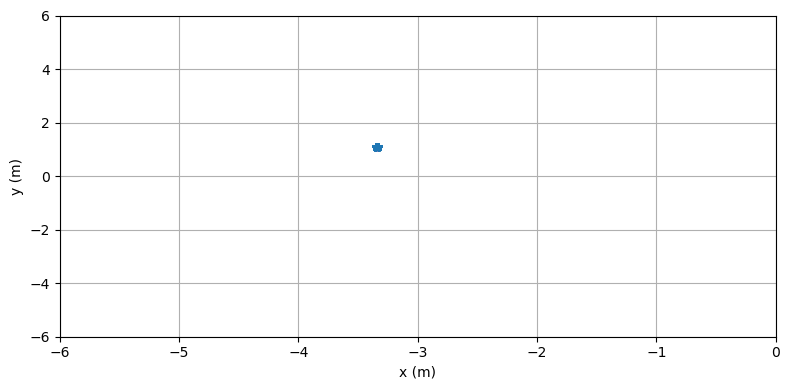

In [392]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey='col', figsize=(8, 4), tight_layout=True)

ax.plot(x_ball_mocap, y_ball_mocap, '*')
ax.grid()
ax.set_xlim(-6, 0)
ax.set_ylim(-6, 6)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')


Text(0.5, 0.98, 'Fig (1): A plot of the quadrotor states')

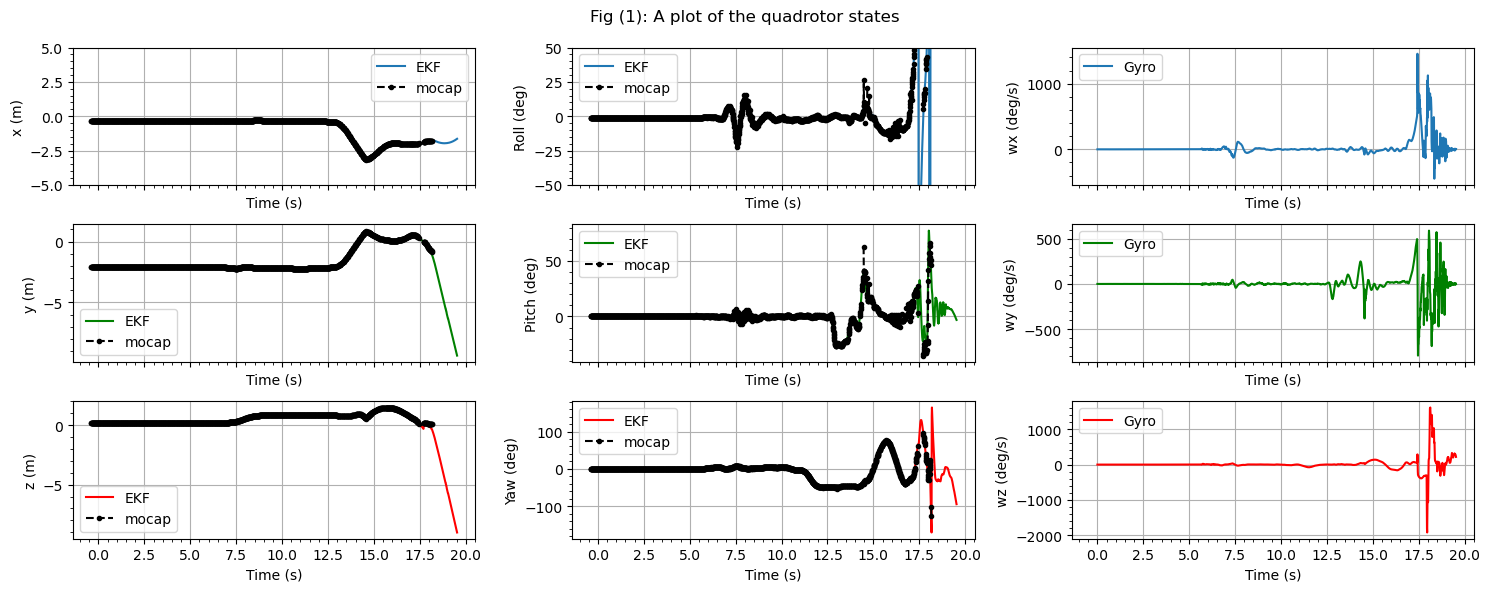

In [393]:
fig, ax = plt.subplots(3, 3, sharex=True, figsize=(15, 6), tight_layout=True)

ax[0, 0].plot(t, x, '-', label='EKF')
ax[0, 0].plot(t_mocap, x_mocap, '.--k', label='mocap')
ax[0, 0].set_ylabel("x (m)")

ax[1, 0].plot(t, y, '-g', label='EKF')
ax[1, 0].plot(t_mocap, y_mocap, '.--k', label='mocap')
ax[1, 0].set_ylabel("y (m)")

ax[2, 0].plot(t, z, '-r', label='EKF')
ax[2, 0].plot(t_mocap, z_mocap, '.--k', label='mocap')
ax[2, 0].set_ylabel("z (m)")

ax[0, 0].set_ylim([-5, 5])



ax[0, 1].plot(t, roll, '-', label='EKF')
ax[0, 1].plot(t_mocap, roll_mocap, '.--k', label='mocap')
ax[0, 1].set_ylabel("Roll (deg)")

ax[1, 1].plot(t, pitch, '-g', label='EKF')
ax[1, 1].plot(t_mocap, pitch_mocap, '.--k', label='mocap')
ax[1, 1].set_ylabel("Pitch (deg)")

ax[2, 1].plot(t, yaw, '-r', label='EKF')
ax[2, 1].plot(t_mocap, yaw_mocap, '.--k', label='mocap')
ax[2, 1].set_ylabel("Yaw (deg)")
ax[0, 1].set_ylim([-50, 50])




ax[0, 2].plot(t, wx, '-', label='Gyro')
ax[0, 2].set_ylabel("wx (deg/s)")

ax[1, 2].plot(t, wy, '-g', label='Gyro')
ax[1, 2].set_ylabel("wy (deg/s)")

ax[2, 2].plot(t, wz, '-r', label='Gyro')
ax[2, 2].set_ylabel("wz (deg/s)")

# ax[0, 1].set_ylim([-50, 50])


for axis in ax.flat:
    axis.grid()
    axis.legend()
    # axis.set_ylim([-60, 60])
    # axis.set_xlim([0, 14.5])
    axis.minorticks_on()
    axis.set_xlabel("Time (s)")

fig.suptitle("Fig (1): A plot of the quadrotor states")

In [394]:
i_want = [i for i in range(len(t_mocap)) if i not in []]

In [395]:
drone_data_copy = {}
for key, value in drone_data.items():
    drone_data_copy[key.replace('.', '_')] = value

drone_data_copy['V_MAX'] = V_MAX
drone_data_copy['P_LAND_DES'] = P_LAND_DES
drone_data_copy['Z_APEX'] = Z_APEX
drone_data_copy['drone'] = {}
drone_data_copy['soccerball'] = {}

drone_data_copy['drone']['time_mocap'] = t_mocap[i_want]
drone_data_copy['drone']['x_mocap'] = x_mocap[i_want]
drone_data_copy['drone']['y_mocap'] = y_mocap[i_want]
drone_data_copy['drone']['z_mocap'] = z_mocap[i_want]
drone_data_copy['drone']['roll_mocap'] = roll_mocap[i_want]
drone_data_copy['drone']['pitch_mocap'] = pitch_mocap[i_want]
drone_data_copy['drone']['yaw_mocap'] = yaw_mocap[i_want]

drone_data_copy['soccerball']['time_mocap'] = t_mocap[i_want]
drone_data_copy['soccerball']['x_mocap'] = x_ball_mocap
drone_data_copy['soccerball']['y_mocap'] = y_ball_mocap
drone_data_copy['soccerball']['z_mocap'] = z_ball_mocap
drone_data_copy['soccerball']['R'] = R_soccerball_mocap

print(drone_data_copy.keys())

io.savemat(drone_file.replace('.json', '.mat'), drone_data_copy)

dict_keys(['time', 'stateEstimate_x', 'stateEstimate_y', 'stateEstimate_z', 'stateEstimate_yaw', 'stateEstimate_pitch', 'stateEstimate_roll', 'stateEstimate_vx', 'stateEstimate_vy', 'stateEstimate_vz', 'gyro_x', 'gyro_y', 'gyro_z', 'acc_x', 'acc_y', 'acc_z', 'ctrltarget_x', 'ctrltarget_y', 'ctrltarget_z', 'ctrltarget_roll', 'ctrltarget_pitch', 'ctrltarget_yaw', 'ctrltarget_yawAbs', 'stabilizer_thrust', 'controller_cmd_thrust', 'controller_cmd_roll', 'controller_cmd_pitch', 'controller_cmd_yaw', 'controller_yaw', 'motor_m1', 'motor_m2', 'motor_m3', 'motor_m4', 'pid_freefall_pitch_outP', 'pid_freefall_pitch_outD', 'pid_freefall_roll_outP', 'pid_freefall_roll_outD', 'pid_freefall_yaw_outP', 'pid_freefall_yaw_outD', 'my_fsm_curr_state', 'V_MAX', 'P_LAND_DES', 'Z_APEX', 'drone', 'soccerball'])


# Debug individual attitude control performance


In [396]:
# folder = 
# drone_file = 'data.json'
# mocap_file = 'motion_capture_data.json'

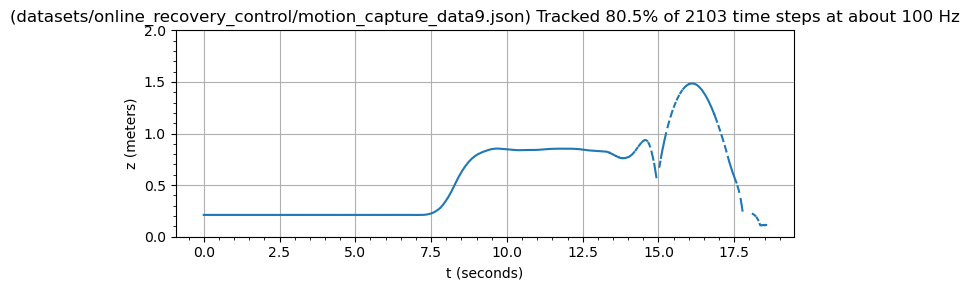

In [397]:
check_mocap_coverage(mocap_file, 'cf1')

In [398]:
raw_drone_data = load_json_data(drone_file)

V_MAX=raw_drone_data.pop('V_MAX')
P_LAND_DES=raw_drone_data.pop('P_LAND_DES')
Z_APEX=raw_drone_data.pop('Z_APEX')

drone_data = resample_data_drone(raw_drone_data, t_min_offset=t_min, t_max_offset=t_max)

t = drone_data['time']

x =             drone_data['stateEstimate.x']
y =             drone_data['stateEstimate.y']
z =             drone_data['stateEstimate.z']
vx =            drone_data['stateEstimate.vx']
vy =            drone_data['stateEstimate.vy']
vz =            drone_data['stateEstimate.vz']
yaw =           drone_data['stateEstimate.yaw']
pitch =        -drone_data['stateEstimate.pitch']
roll  =         drone_data['stateEstimate.roll']
x_des =         drone_data['ctrltarget.x']
y_des =         drone_data['ctrltarget.y']
z_des =         drone_data['ctrltarget.z']
roll_des =      drone_data['ctrltarget.roll']
pitch_des =    -drone_data['ctrltarget.pitch']
# yaw_des =       drone_data['controller.yaw']
yaw_des =       drone_data['ctrltarget.yawAbs']
thrust_cmd =    drone_data['stabilizer.thrust']
cmd_roll =      drone_data['controller.cmd_roll']
cmd_pitch =    -drone_data['controller.cmd_pitch']
cmd_yaw  =      drone_data['controller.cmd_yaw']
cmd_thrust =    drone_data['controller.cmd_thrust']
m1 =            drone_data['motor.m1']
m2 =            drone_data['motor.m2']
m3 =            drone_data['motor.m3']
m4 =            drone_data['motor.m4']
ax =            drone_data['acc.x']
ay =            drone_data['acc.y']
az =            drone_data['acc.z']
wx =            drone_data['gyro.x']
wy =            drone_data['gyro.y']
wz =            drone_data['gyro.z']
pidPitch_outP = drone_data['pid_freefall.pitch_outP']
pidPitch_outD = drone_data['pid_freefall.pitch_outD']
pidRoll_outP  = drone_data['pid_freefall.roll_outP']
pidRoll_outD  = drone_data['pid_freefall.roll_outD'] 
fsm_state     = drone_data['my_fsm.curr_state']

i_ff = np.argwhere(abs(pitch_des) > 0)[0]
print(i_ff)
i_land = np.argwhere(az > 2.5)[0]
print(i_land)

[1408]
[1452]


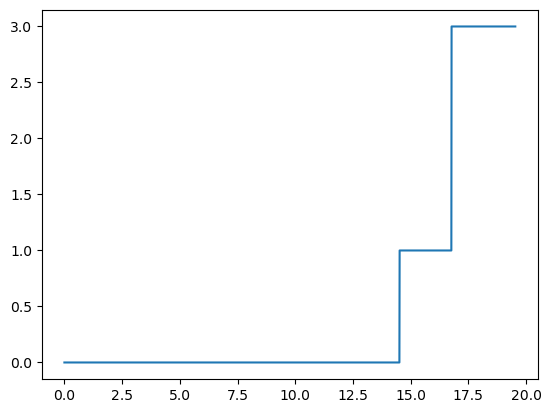

In [399]:
plt.plot(t, fsm_state)

In [400]:
print(Z_APEX)
print(P_LAND_DES)
print(V_MAX)

0.78
[-2.9874016595284942, 3.186579278157253]
3.3


In [401]:
# mocap_data, t_shit_min = sync_data_mocap(
#         convert_rot_matrices_to_euler(
#         load_json_data(mocap_file)['cf1']
#     ),
#     t, z)

# x_mocap = mocap_data['x']
# y_mocap = mocap_data['y']
# z_mocap = mocap_data['z']

# roll_mocap = mocap_data['roll']
# pitch_mocap = mocap_data['pitch']
# yaw_mocap = mocap_data['yaw']

mocap_data_w_RPY = convert_rot_matrices_to_euler(
        load_json_data(mocap_file)['cf1']
    )

mocap_data, t_shift_min = sync_data_mocap(mocap_data_w_RPY, t, z)

print(f'Required time shift = {t_shift_min:2.2f} seconds')

t_mocap = np.array(mocap_data_w_RPY['time'], dtype=np.float64)
t_mocap -= (mocap_data_w_RPY['time'][0] - t_shift_min)
x_mocap = np.array(mocap_data_w_RPY['x'], dtype=np.float64)
y_mocap = np.array(mocap_data_w_RPY['y'], dtype=np.float64)
z_mocap = np.array(mocap_data_w_RPY['z'], dtype=np.float64)

roll_mocap = np.array(mocap_data_w_RPY['roll'], dtype=np.float64)
pitch_mocap = np.array(mocap_data_w_RPY['pitch'], dtype=np.float64)
yaw_mocap = np.array(mocap_data_w_RPY['yaw'], dtype=np.float64)

Required time shift = -0.39 seconds


Text(0.5, 0.98, 'Fig (1): A plot of the quadrotor states')

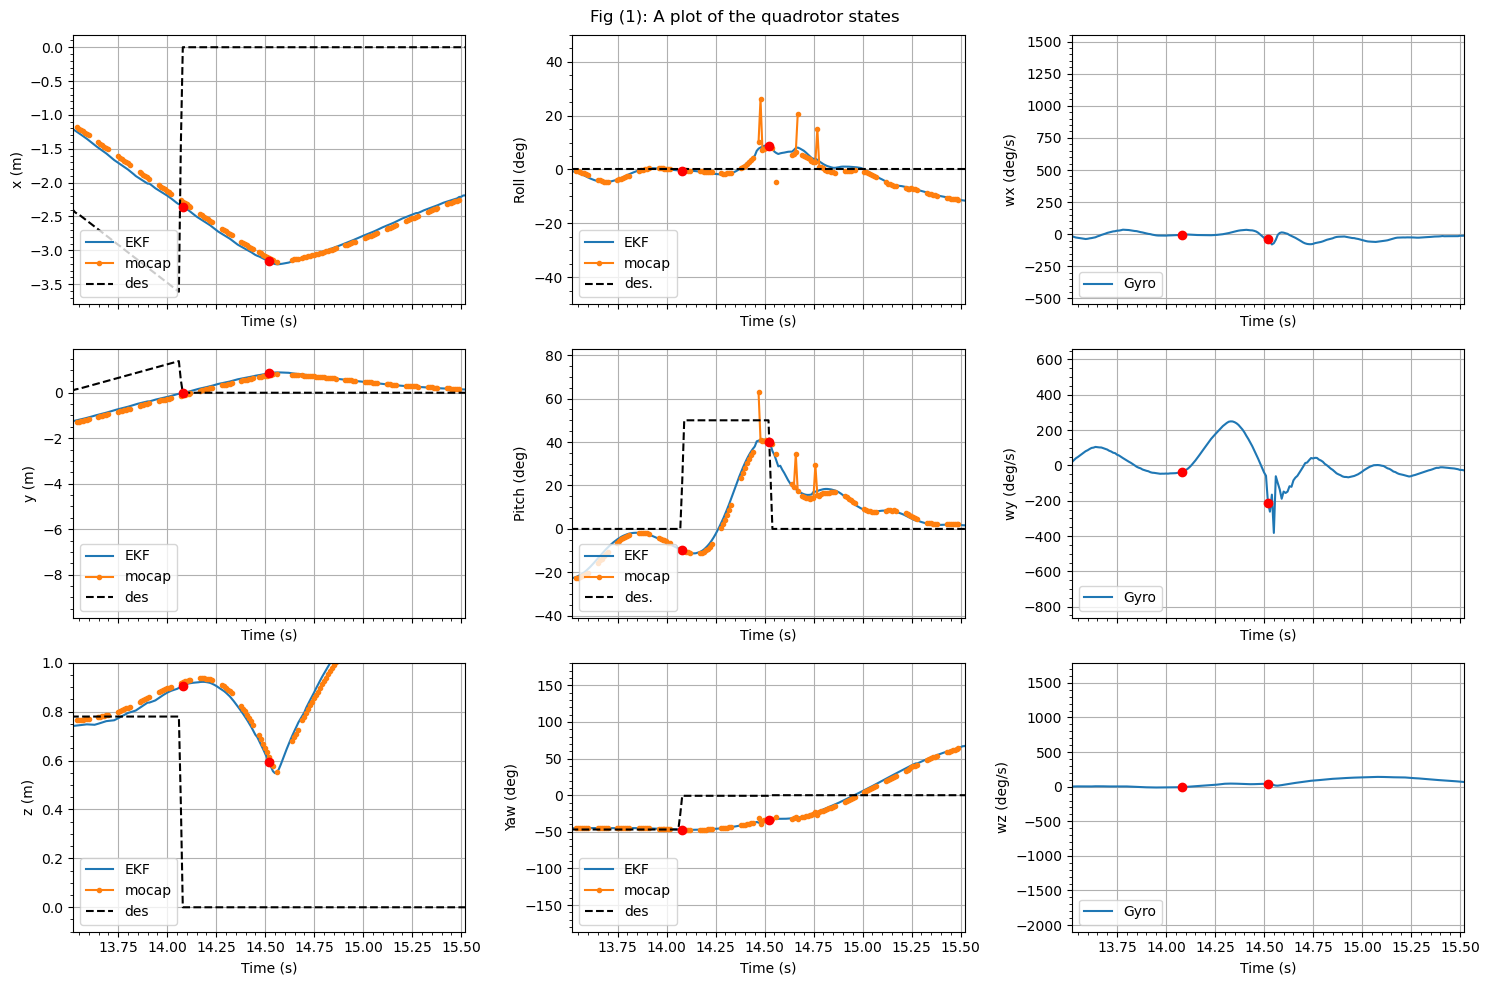

In [402]:
fig, ax = plt.subplots(3, 3, sharex=True, figsize=(15, 10), tight_layout=True)

ax[0, 0].plot(t, x, label='EKF')
ax[0, 0].plot(t_mocap, x_mocap, '.-', label='mocap')
ax[0, 0].plot(t, x_des, '--k', label='des')
ax[0, 0].plot(t[i_ff], x[i_ff], 'or')
ax[0, 0].plot(t[i_land], x[i_land], 'or')
ax[0, 0].set_ylabel("x (m)")

ax[1, 0].plot(t, y, label='EKF')
ax[1, 0].plot(t_mocap, y_mocap, '.-', label='mocap')
ax[1, 0].plot(t, y_des, '--k', label='des')
ax[1, 0].plot(t[i_ff], y[i_ff], 'or')
ax[1, 0].plot(t[i_land], y[i_land], 'or')
ax[1, 0].set_ylabel("y (m)")

ax[2, 0].plot(t, z, label='EKF')
ax[2, 0].plot(t_mocap, z_mocap, '.-', label='mocap')
ax[2, 0].plot(t, z_des, '--k', label='des')
ax[2, 0].plot(t[i_ff], z[i_ff], 'or')
ax[2, 0].plot(t[i_land], z[i_land], 'or')
ax[2, 0].set_ylabel("z (m)")
ax[2, 0].set_ylim([-0.1, 1])


ax[0, 1].plot(t, roll, label='EKF')
ax[0, 1].plot(t_mocap, roll_mocap, '.-', label='mocap')
ax[0, 1].plot(t, roll_des, '--k', label='des.')
ax[0, 1].plot(t[i_ff], roll[i_ff], 'or')
ax[0, 1].plot(t[i_land], roll[i_land], 'or')
ax[0, 1].set_ylabel("Roll (deg)")
ax[0, 1].set_ylim([-50, 50])

ax[1, 1].plot(t, pitch, label='EKF')
ax[1, 1].plot(t_mocap, pitch_mocap, '.-', label='mocap')
ax[1, 1].plot(t, pitch_des, '--k', label='des.')
ax[1, 1].plot(t[i_ff], pitch[i_ff], 'or')
ax[1, 1].plot(t[i_land], pitch[i_land], 'or')
ax[1, 1].set_ylabel("Pitch (deg)")

ax[2, 1].plot(t, yaw, label='EKF')
ax[2, 1].plot(t_mocap, yaw_mocap, '.-', label='mocap')
ax[2, 1].plot(t, yaw_des, '--k', label='des')
ax[2, 1].plot(t[i_ff], yaw[i_ff], 'or')
ax[2, 1].plot(t[i_land], yaw[i_land], 'or')
ax[2, 1].set_ylabel("Yaw (deg)")
# ax[2, 0].set_ylim([-60, 40])

ax[0, 2].plot(t, wx, label='Gyro')
ax[0, 2].plot(t[i_ff], wx[i_ff], 'or')
ax[0, 2].plot(t[i_land], wx[i_land], 'or')
ax[0, 2].set_ylabel("wx (deg/s)")

ax[1, 2].plot(t, wy, label='Gyro')
ax[1, 2].plot(t[i_ff], wy[i_ff], 'or')
ax[1, 2].plot(t[i_land], wy[i_land], 'or')
ax[1, 2].set_ylabel("wy (deg/s)")

ax[2, 2].plot(t, wz, label='Gyro')
ax[2, 2].plot(t[i_ff], wz[i_ff], 'or')
ax[2, 2].plot(t[i_land], wz[i_land], 'or')
ax[2, 2].set_ylabel("wz (deg/s)")
# ax[2, 2].set_ylim([-0.1, 1])


# ax[0, 1].set_ylim([-3.5, 3.5])
# ax[0, 1].set_ylim([-50, 50])
dt = 1
ax[0, 0].set_xlim([t[i_land]-dt, t[i_land]+dt])
ax[0, 1].set_xlim([t[i_land]-dt, t[i_land]+dt])

for axis in ax.flat:
    axis.grid()
    axis.legend(loc='lower left')
    # axis.set_ylim([-60, 60])
    # axis.set_xlim([0, 4.5])
    axis.minorticks_on()
    axis.set_xlabel("Time (s)")

fig.suptitle("Fig (1): A plot of the quadrotor states")

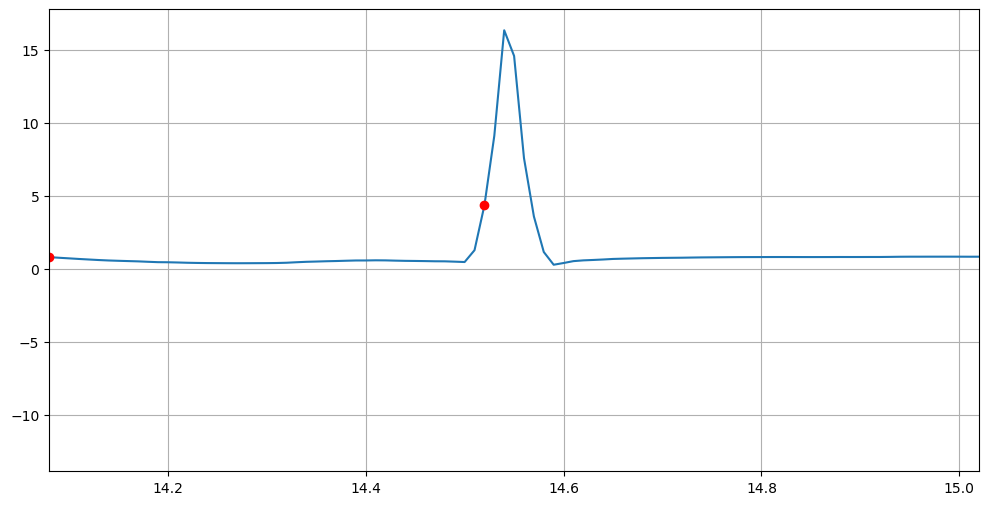

In [403]:
fig, ax =  plt.subplots(1,1, figsize=(12,6))

ax.plot(t, az)
ax.plot(t[i_ff], az[i_ff], 'or')
ax.plot(t[i_land], az[i_land], 'or')

ax.set_xlim([t[i_ff], t[i_land]+0.5])
ax.grid()

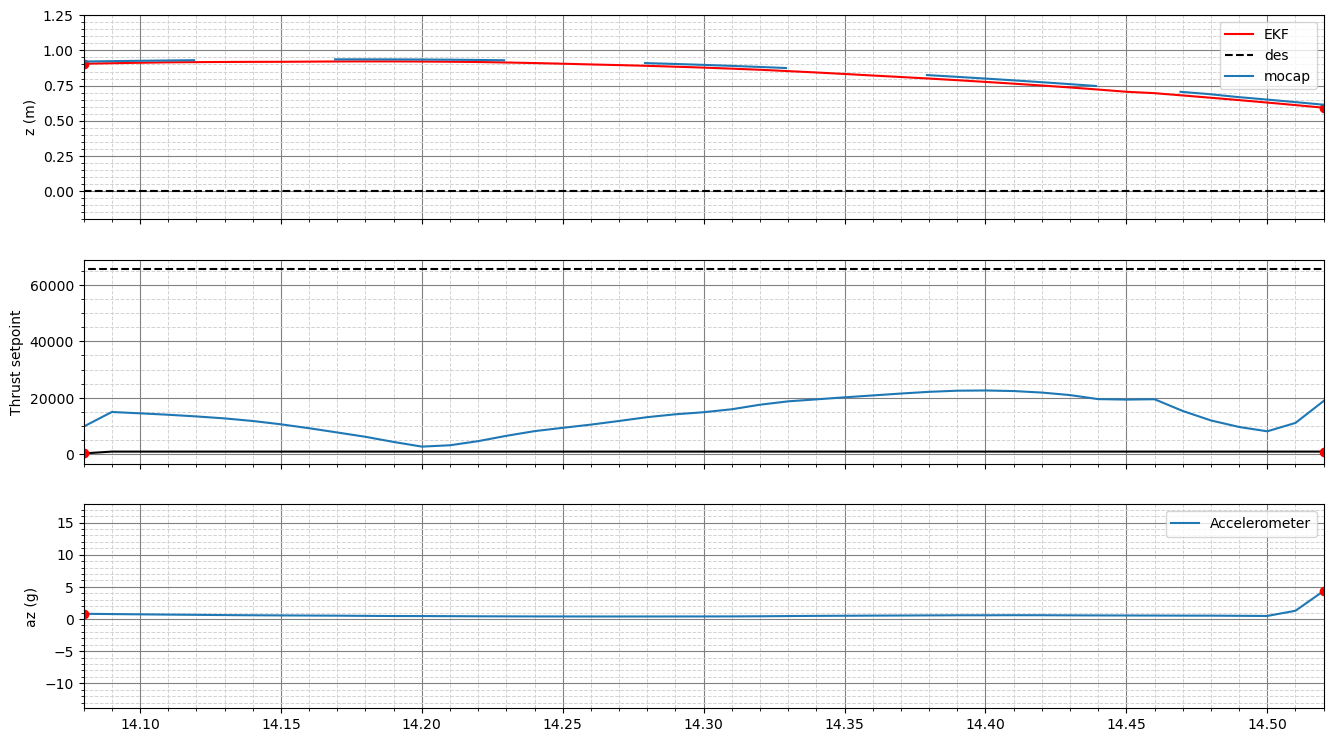

In [404]:
fig, ax = plt.subplots(3, 1, figsize=(16, 9), sharex=True)

ax[0].plot(t, z, '-r', label='EKF')
ax[0].plot(t[i_ff], z[i_ff], 'or')
ax[0].plot(t[i_land], z[i_land], 'or')
ax[0].plot(t, z_des, '--k', label='des')
ax[0].plot(t_mocap, z_mocap, '-', label='mocap')
ax[0].set_ylabel("z (m)")
ax[0].minorticks_on()
ax[0].grid(which='major', color='gray', linestyle='-', linewidth=0.8)
ax[0].set_ylim(-0.2, 1.25)
ax[0].grid(which='minor', color='lightgray', linestyle='--', linewidth=0.7)
ax[0].legend()

ax[0].set_xlim([t[i_ff], t[i_land]])

thrust_applied = (m1+m2+m3+m4)/4

ax[1].plot(t, cmd_thrust, '-k')
ax[1].plot(t, thrust_applied, '-')
ax[1].plot(t[i_ff], cmd_thrust[i_ff], 'or')
ax[1].plot(t[i_land], cmd_thrust[i_land], 'or')
ax[1].set_ylabel("Thrust setpoint")
ax[1].minorticks_on()
ax[1].grid(which='major', color='gray', linestyle='-', linewidth=0.8)
# ax[1].set_xlim(0, 16)
# ax[1].set_xlim(0, 16)
ax[1].plot(t, 65535*np.ones_like(t), '--k')
ax[1].grid(which='minor', color='lightgray', linestyle='--', linewidth=0.7)

ax[2].plot(t, az, '-', label='Accelerometer')
ax[2].plot(t[i_ff], az[i_ff], 'or')
ax[2].plot(t[i_land], az[i_land], 'or')
ax[2].set_ylabel("az (g)")
ax[2].minorticks_on()
ax[2].grid(which='major', color='gray', linestyle='-', linewidth=0.8)
# ax[2].set_ylim(-0.2, 1.25)
ax[2].grid(which='minor', color='lightgray', linestyle='--', linewidth=0.7)
ax[2].legend()

Text(0, 0.5, 'x (m)')

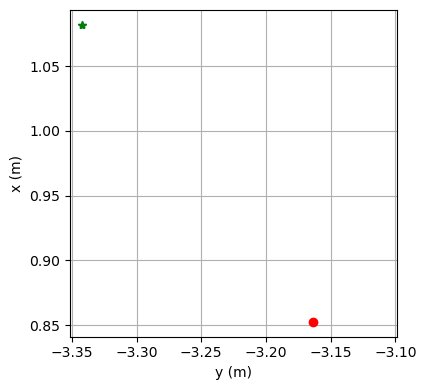

In [405]:
fig, ax = plt.subplots(1, 1, sharex=True, sharey='col', figsize=(8, 4), tight_layout=True)

ax.plot(x_ball_mocap[0], y_ball_mocap[0], '*')
ax.plot(x_ball_mocap[0], y_ball_mocap[0], 'g*')
ax.plot(x[i_land], y[i_land], 'ro')
# circle = Circle([x_ball_mocap[0], y_ball_mocap[0]], R_soccerball_mocap[0])
# ax.add_patch(circle)
ax.grid()
ax.set_xlim(-4, -2)
# ax.set_ylim(-3, 3)
ax.axis('square')
ax.set_xlabel('y (m)')
ax.set_ylabel('x (m)')


Text(0.5, 0.98, 'Fig: A plot of the quadrotor velocities')

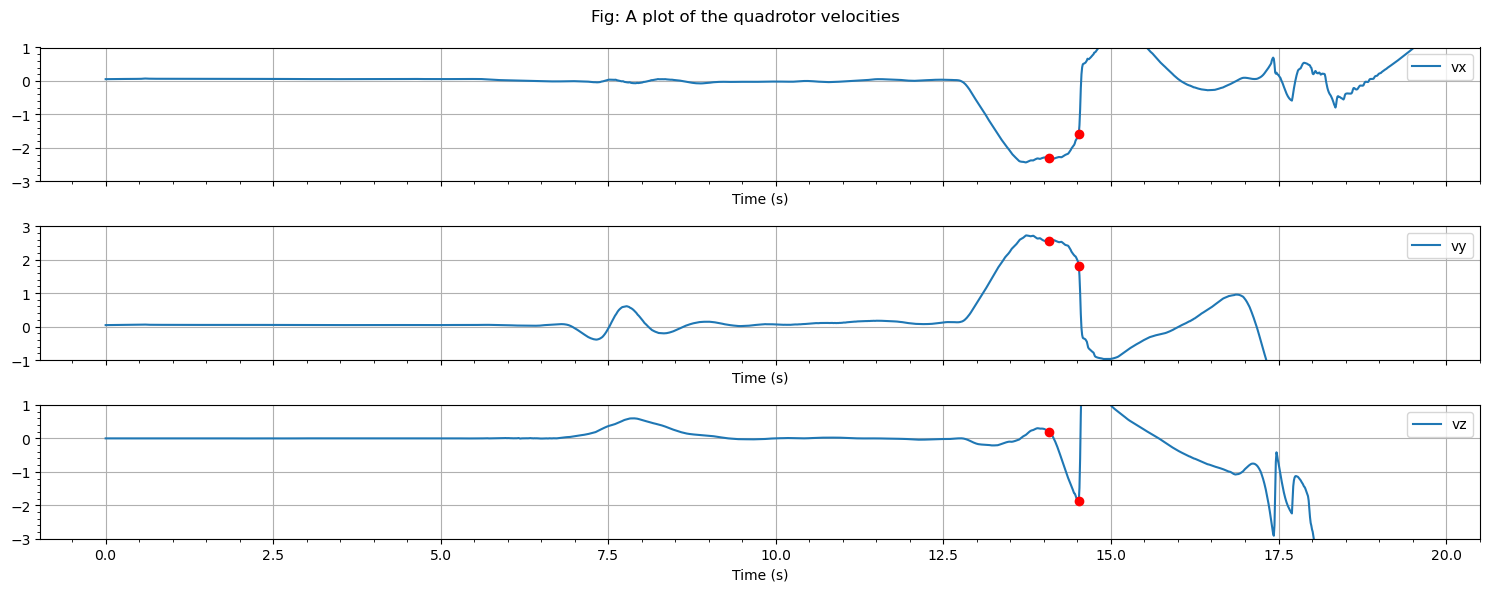

In [406]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(15, 6), tight_layout=True)

ax[0].plot(t, vx, label='vx')
ax[0].plot(t[i_ff], vx[i_ff], 'or')
ax[0].plot(t[i_land], vx[i_land], 'or')
ax[0].set_ylim(-3, 1)

ax[1].plot(t, vy, label='vy')
ax[1].plot(t[i_ff], vy[i_ff], 'or')
ax[1].plot(t[i_land], vy[i_land], 'or')
ax[1].set_ylim([-1, 3])

ax[2].plot(t, vz, label='vz')
ax[2].plot(t[i_ff], vz[i_ff], 'or')
ax[2].plot(t[i_land], vz[i_land], 'or')
ax[2].set_ylim([-3, 1])

for axis in ax.flat:
    axis.grid()
    axis.legend()
    # axis.set_ylim([-60, 60])
    # axis.set_xlim([0, 4.5])
    axis.minorticks_on()
    axis.set_xlabel("Time (s)")

fig.suptitle("Fig: A plot of the quadrotor velocities")

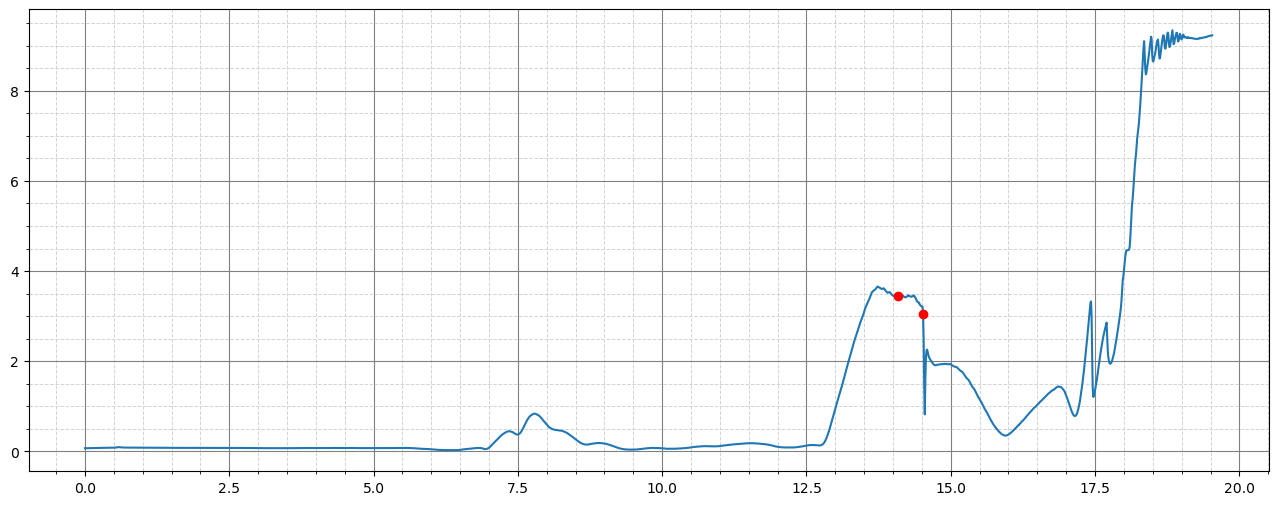

In [407]:
v_lat = np.sqrt(vx**2+vy**2+vz**2)

fig, ax = plt.subplots(1, 1, figsize=(16, 6))

ax.plot(t, v_lat)
ax.plot(t[i_ff], v_lat[i_ff], 'or')
ax.plot(t[i_land], v_lat[i_land], 'or')
ax.minorticks_on()
ax.grid(which='major', color='gray', linestyle='-', linewidth=0.8)
# ax.set_ylim(-1.5, 4.5)
ax.grid(which='minor', color='lightgray', linestyle='--', linewidth=0.7)

data2: 3.6 to 2.6

data3: 3.6 to 2.6 ish 

Increasing drop height doesn't affect how much velocity is lost

After increasing the lunge velocity, to 3.6m/s

data4: 3.8 to 3.1 ish



Text(0.5, 0.98, 'Fig (2): Applied motor power commands (no units). Using custom control allocation')

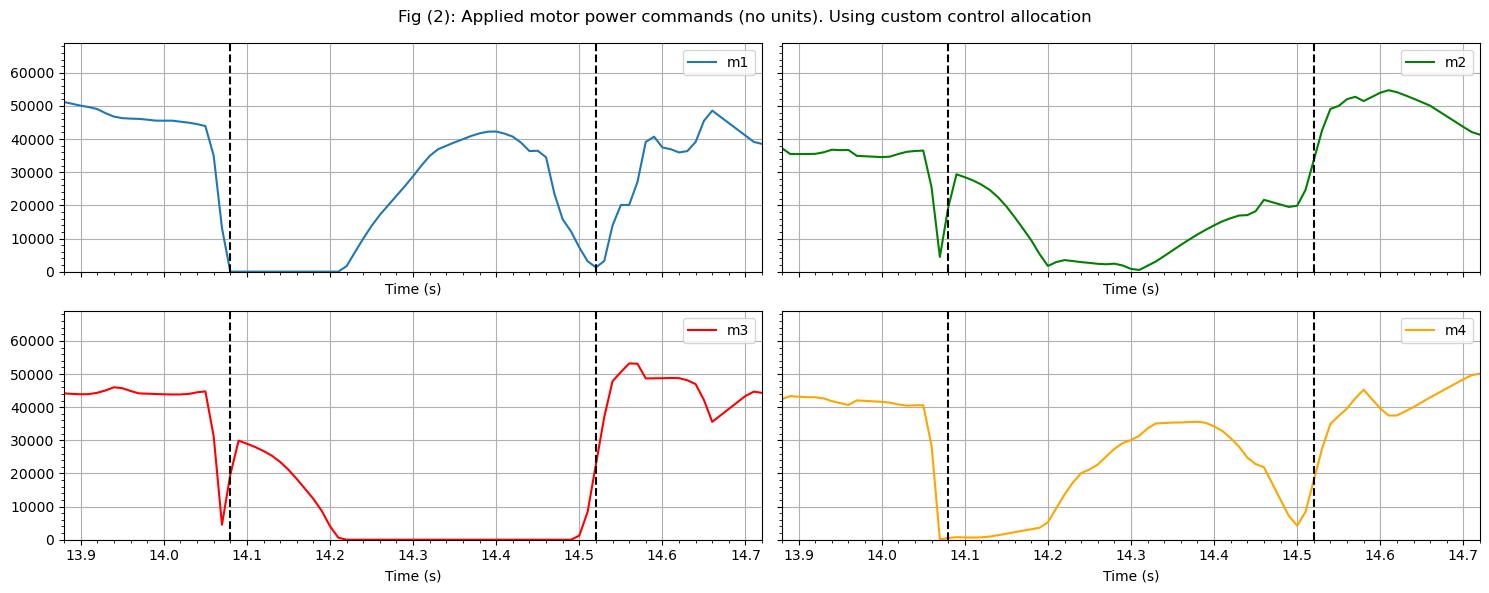

In [408]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, tight_layout=True, figsize=(15, 6))

ax[0, 0].plot(t, m1, '-', label='m1')
ax[0, 1].plot(t, m2, '-g', label='m2')
ax[1, 0].plot(t, m3, '-r', label='m3')
ax[1, 1].plot(t, m4, color='orange', label='m4')
for axis in ax.flat:
    axis.axvline(t[i_ff], 0, 69000, ls='--', c='k')
    axis.axvline(t[i_land], 0, 69000, ls='--', c='k')
    axis.set_xlabel("Time (s)")
    axis.grid()
    axis.legend()
    axis.set_ylim([0, 69000])
    axis.set_xlim([t[i_ff-20], t[i_land+20]])
    axis.minorticks_on()

fig.suptitle("Fig (2): Applied motor power commands (no units). Using custom control allocation")

In [409]:
# These are APPLIED or ACTUAL control inputs...

f =     (m1+m2+m3+m4)/4
Tx =    (m3+m4-m1-m2)/4
Ty =   -(m1+m4-m2-m3)/4    # Think: why the negative sign?
Tz =    (m1+m3-m2-m4)/4

Text(0.5, 0.98, 'Fig (3): Compare desired and actual control inputs. Also plot the limits')

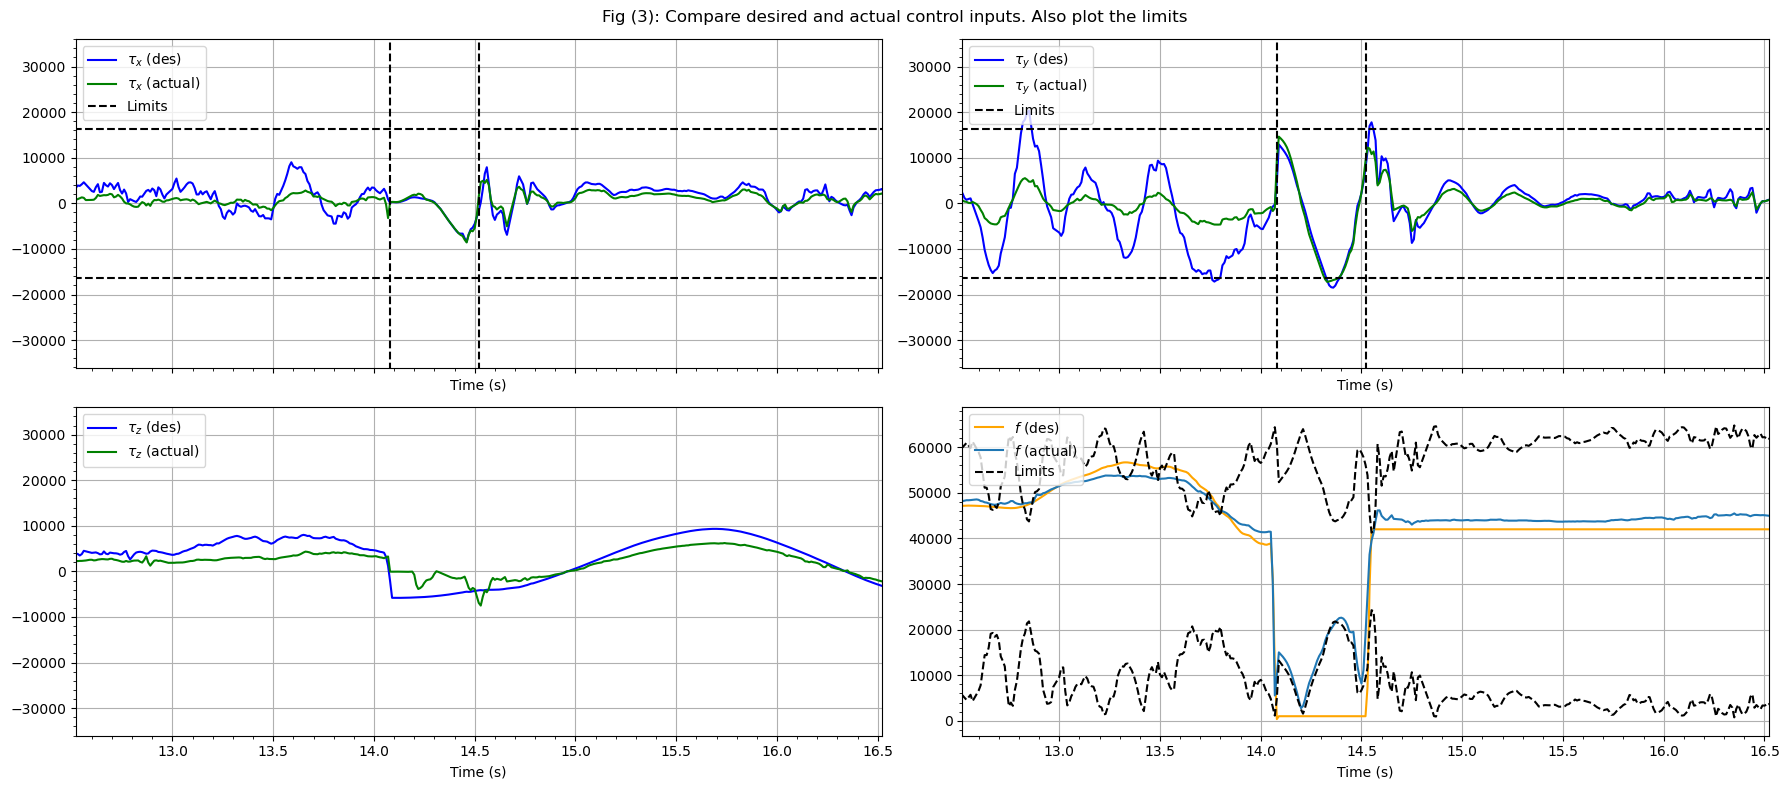

In [410]:
fig, ax = plt.subplots(2, 2, tight_layout=True, sharex=True, figsize=(18, 8))

ax[0, 0].plot(t, cmd_roll, '-b', label=r'$\tau_x$ (des)')
ax[0, 0].plot(t, Tx, '-g', label=r'$\tau_x$ (actual)')
ax[0, 0].plot(t, 65535/4*np.ones_like(t), '--k', label='Limits')
ax[0, 0].plot(t, -65535/4*np.ones_like(t), '--k')
ax[0, 0].axvline(t[i_ff], -65535/4, 65535/4, ls='--', c='k')
ax[0, 0].axvline(t[i_land], -65535/4, 65535/4, ls='--', c='k')

ax[0, 1].plot(t, cmd_pitch, '-b', label=r'$\tau_y$ (des)')
ax[0, 1].plot(t, Ty, '-g', label=r'$\tau_y$ (actual)')
ax[0, 1].plot(t, 65535/4*np.ones_like(t), '--k', label='Limits')
ax[0, 1].plot(t, -65535/4*np.ones_like(t), '--k')
ax[0, 1].axvline(t[i_ff], -65535/4, 65535/4, ls='--', c='k')
ax[0, 1].axvline(t[i_land], -65535/4, 65535/4, ls='--', c='k')

ax[1, 0].plot(t, cmd_yaw, '-b', label=r'$\tau_z$ (des)')
ax[1, 0].plot(t, Tz, '-g', label=r'$\tau_z$ (actual)')


ax[1, 1].plot(t, cmd_thrust, color='orange', label=r'$f$ (des)')
ax[1, 1].plot(t, f,  label=r'$f$ (actual)')
ax[1, 1].plot(t, np.abs(cmd_roll)+np.abs(cmd_pitch), '--k', label='Limits')
ax[1, 1].plot(t, 65535-np.abs(cmd_roll)-np.abs(cmd_pitch), '--k')

dt = 2.0
ax[0, 0].set_xlim([t[i_land] - dt, t[i_land] + dt])
ax[0, 1].set_xlim([t[i_land] - dt, t[i_land] + dt])

for axis in ax.flat:
    axis.grid()
    axis.legend(loc='upper left')
    # axis.set_xlim([t[i_ff-20], t[i_land+20]])
    # axis.set_ylim([0, 69000])
    axis.minorticks_on()
    axis.set_xlabel("Time (s)")

fig.suptitle("Fig (3): Compare desired and actual control inputs. Also plot the limits")


Text(0.5, 0.98, 'Fig (3): Compare desired and actual control inputs. Also plot the limits')

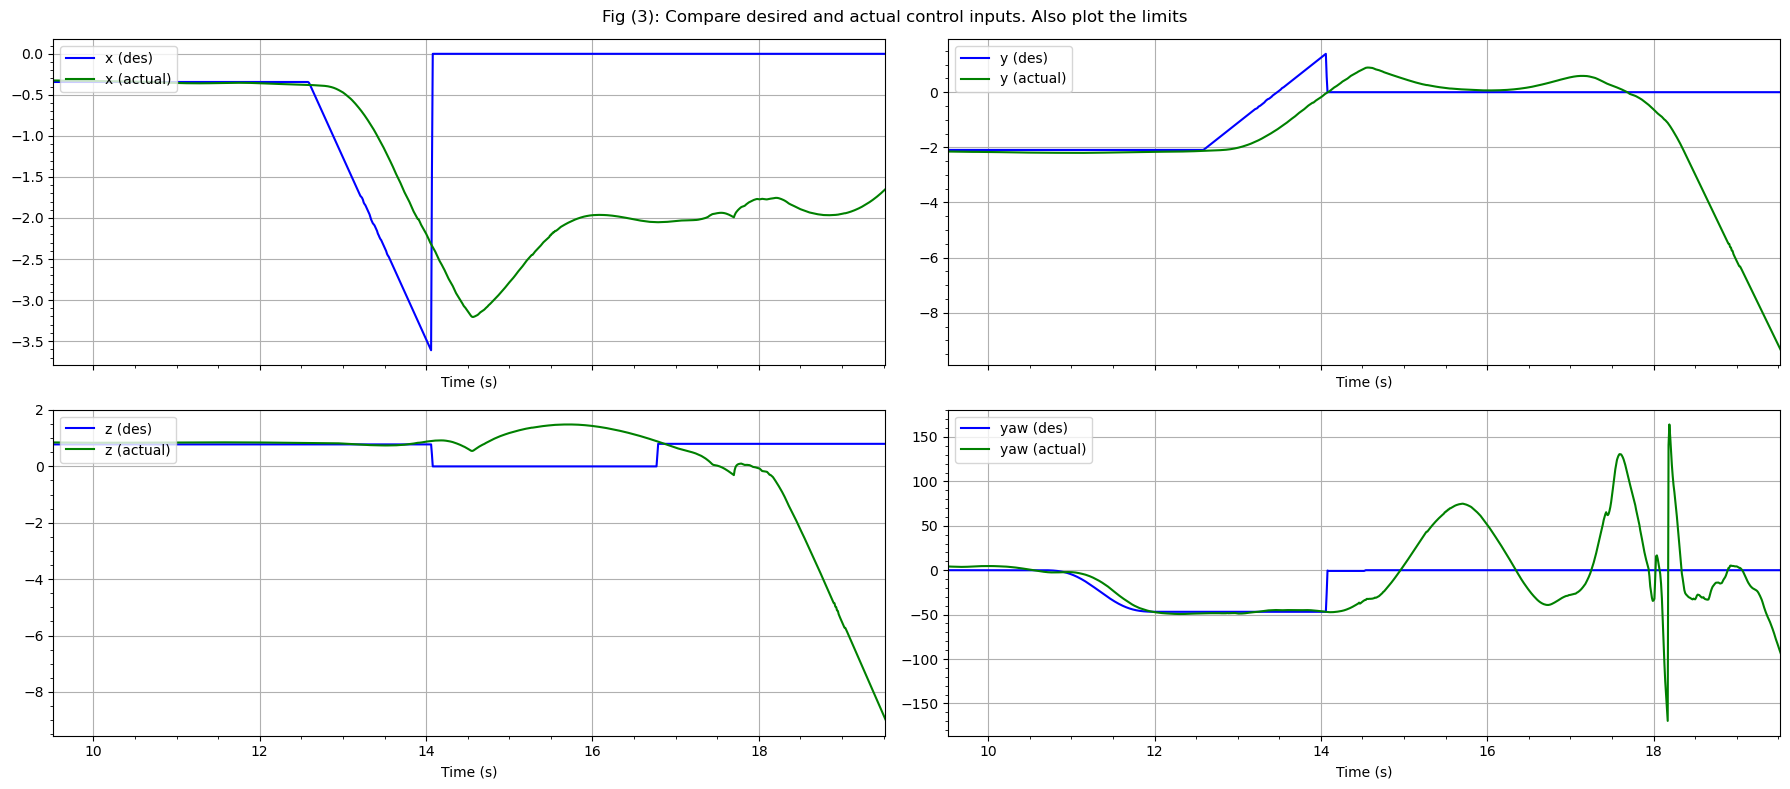

In [411]:
fig, ax = plt.subplots(2, 2, tight_layout=True, sharex=True, figsize=(18, 8))

ax[0, 0].plot(t, x_des, '-b', label=r'x (des)')
ax[0, 0].plot(t, x, '-g', label=r'x (actual)')


ax[0, 1].plot(t, y_des, '-b', label=r'y (des)')
ax[0, 1].plot(t, y, '-g', label=r'y (actual)')

ax[1, 0].plot(t, z_des, '-b', label=r'z (des)')
ax[1, 0].plot(t, z, '-g', label=r'z (actual)')


ax[1, 1].plot(t, yaw_des, '-b', label=r'yaw (des)')
ax[1, 1].plot(t, yaw, '-g', label=r'yaw (actual)')

dt = 5.0
ax[0, 0].set_xlim([t[i_land] - dt, t[i_land] + dt])
ax[0, 1].set_xlim([t[i_land] - dt, t[i_land] + dt])

for axis in ax.flat:
    axis.grid()
    axis.legend(loc='upper left')
    # axis.set_xlim([t[i_ff-20], t[i_land+20]])
    # axis.set_ylim([0, 69000])
    axis.minorticks_on()
    axis.set_xlabel("Time (s)")

fig.suptitle("Fig (3): Compare desired and actual control inputs. Also plot the limits")


In [412]:
t_levelout = t[np.bitwise_and(t>14.50, cmd_thrust==42000)][0]
print(t_levelout)

print(t_levelout-t[i_land])

14.55
[0.03]


Text(0.5, 0.98, 'Fig (4): Closed loop response in pitch angle')

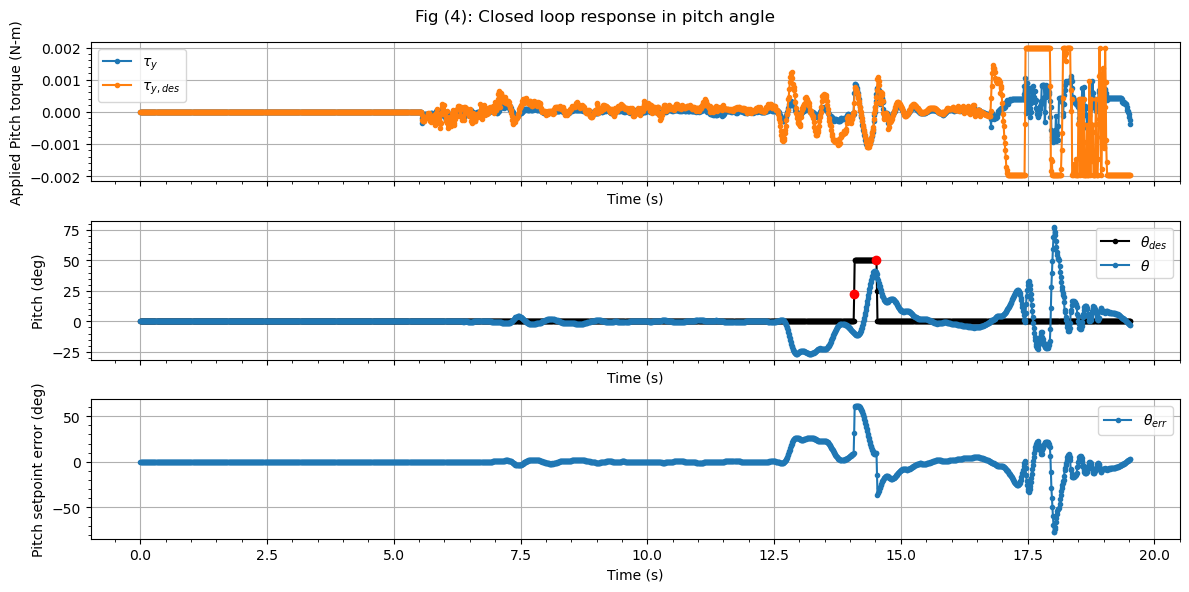

In [413]:
l = 6.5e-2/2
k_F = 1.85e-06

Ty_in_N = k_F * l * Ty
Ty_des_in_N = k_F * l * cmd_pitch

fig, ax = plt.subplots(3, 1, sharex=True, tight_layout=True, figsize=(12, 6))

ax[0].plot(t, Ty_in_N, '.-', label=r"$\tau_y$")
ax[0].set_ylabel("Applied Pitch torque (N-m)")
ax[0].plot(t, Ty_des_in_N, '.-', label=r"$\tau_{y,des}$")
axis.legend()

ax[1].plot(t, pitch_des, '.-k',label=r'$\theta_{des}$')
ax[1].plot(t, pitch, '.-', label=r'$\theta$')
ax[1].plot(t[i_ff], pitch_des[i_ff], 'or')
ax[1].plot(t[i_land], pitch_des[i_land], 'or')
# ax[1].set_ylim([-40, 40])
ax[1].set_ylabel("Pitch (deg)")

ax[2].plot(t, pitch_des-pitch, '.-', label=r'$\theta_{err}$')
ax[2].set_ylabel("Pitch setpoint error (deg)")

for axis in ax:
    # axis.set_xlim([11, 11.5])
    axis.set_xlabel("Time (s)")
    axis.grid()
    axis.legend()
    axis.minorticks_on()
    # axis.set_ylim([-20, 60])

fig.suptitle("Fig (4): Closed loop response in pitch angle")

Text(0.5, 0.98, 'Fig (5): Control input from the free-fall attitude controller (pitch, no units)')

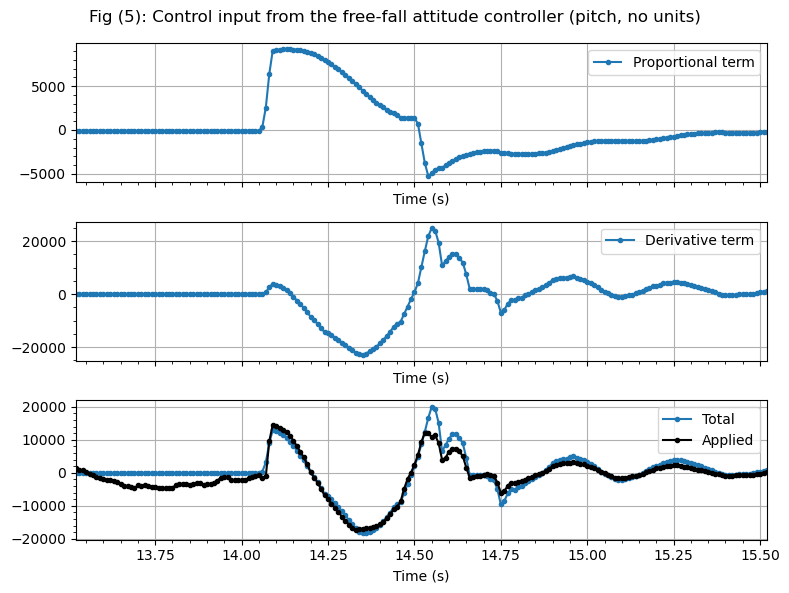

In [414]:
fig, ax = plt.subplots(3, 1, sharex=True, tight_layout=True, figsize=(8, 6))

ax[0].plot(t, -pidPitch_outP, '.-', label='Proportional term')
# ax[0].set_ylim([-2000, 8000])

ax[1].plot(t, -pidPitch_outD, '.-', label='Derivative term')
# ax[1].set_ylim([-25000, 10000])

ax[2].plot(t, -pidPitch_outP - pidPitch_outD, '.-', label='Total')
ax[2].plot(t, Ty, '.-k', label='Applied')
# ax[2].set_ylim([-25000, 10000])

for axis in ax:
    dt = 1.0
    axis.set_xlim([t[i_land] - dt, t[i_land] + dt])
    axis.legend()
    axis.grid()
    axis.minorticks_on()
    axis.set_xlabel("Time (s)")
    # axis.set_ylim([-90, 90])

fig.suptitle("Fig (5): Control input from the free-fall attitude controller (pitch, no units)")

Text(0.5, 0.98, 'Fig (4): Closed loop response in roll angle')

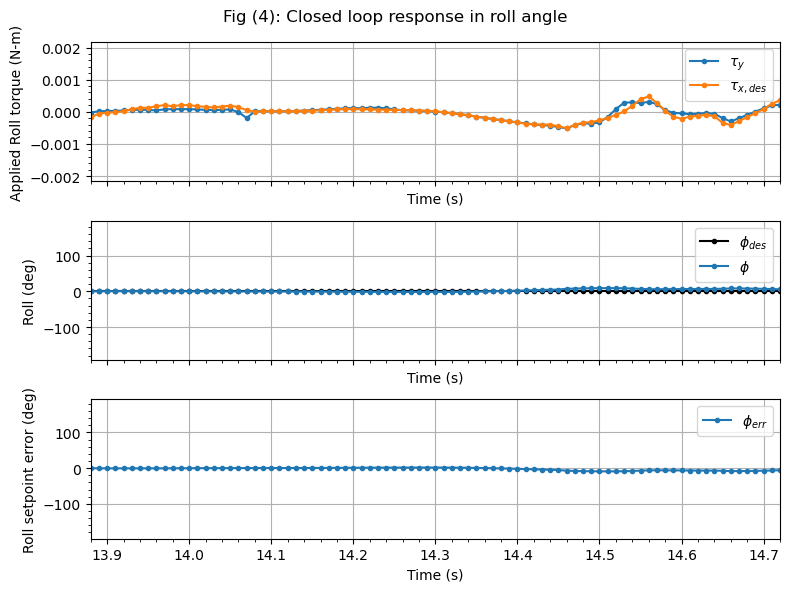

In [415]:
l = 6.5e-2/2
k_F = 1.85e-06

Tx_in_N = k_F * l * Tx
Tx_des_in_N = k_F * l * cmd_roll

fig, ax = plt.subplots(3, 1, sharex=True, tight_layout=True, figsize=(8, 6))

ax[0].plot(t, Tx_in_N, '.-', label=r"$\tau_y$")
ax[0].set_ylabel("Applied Roll torque (N-m)")
ax[0].plot(t, Tx_des_in_N, '.-', label=r"$\tau_{x,des}$")
axis.legend()

ax[1].plot(t, roll_des, '.-k',label=r'$\phi_{des}$')
ax[1].plot(t, roll, '.-', label=r'$\phi$')
# ax[1].set_ylim([-40, 40])
ax[1].set_ylabel("Roll (deg)")

ax[2].plot(t, roll_des-roll, '.-', label=r'$\phi_{err}$')
ax[2].set_ylabel("Roll setpoint error (deg)")

for axis in ax:
    axis.set_xlim([t[i_ff-20], t[i_land+20]])
    axis.set_xlabel("Time (s)")
    axis.grid()
    axis.legend()
    axis.minorticks_on()
    # axis.set_ylim([-70, 70])

fig.suptitle("Fig (4): Closed loop response in roll angle")

Text(0.5, 0.98, 'Fig (5): Control input from the free-fall attitude controller (roll, no units)')

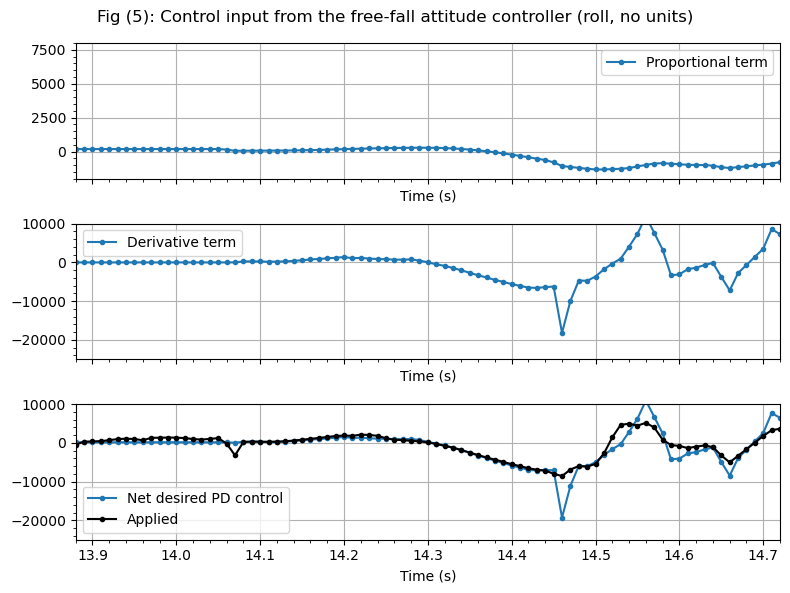

In [416]:
fig, ax = plt.subplots(3, 1, sharex=True, tight_layout=True, figsize=(8, 6))

ax[0].plot(t, pidRoll_outP, '.-', label='Proportional term')
ax[0].set_ylim([-2000, 8000])

ax[1].plot(t, pidRoll_outD, '.-', label='Derivative term')
ax[1].set_ylim([-25000, 10000])

ax[2].plot(t, pidRoll_outP + pidRoll_outD, '.-', label='Net desired PD control')
ax[2].plot(t, Tx, '.-k', label='Applied')
ax[2].set_ylim([-25000, 10000])

for axis in ax:
    axis.set_xlim([t[i_ff-20], t[i_land+20]])
    axis.legend()
    axis.grid()
    axis.minorticks_on()
    axis.set_xlabel("Time (s)")
    # axis.set_ylim([-70, 70])

fig.suptitle("Fig (5): Control input from the free-fall attitude controller (roll, no units)")